# Projet 5 :
# Segmentez des clients d'un site e-commerce

## II) Essais des différentes approches de modélisation


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from datetime import *
from sklearn.cluster import KMeans
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from geopy.distance import distance
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from math import pi

In [2]:
# Chargement du jeu de données data
data = pd.read_csv('data.csv', sep=',')

In [3]:
# Afficher les 5 premières lignes du jeu de données data

data.head()

,customer_unique_id,customer_id_nunique,customer_city_last,customer_state_last,customer_zip_code_prefix_last,order_id_nunique,order_id_count,récence_mean,Rapidité_livraison_mean,order_status_last,...,freight_value_mean,seller_id_last,seller_zip_code_prefix_last,seller_city_last,seller_state_last,latitude_client_mean,longitude_client_mean,latitude_vendeur_mean,longitude_vendeur_mean,%_frais_livraison
0,0000366f3b9a7992bf8c76cfdf3221e2,1.0,cajamar,SP,7787.0,1.0,1.0,160.0,4.0,delivered,...,12.00,da8622b14eb17ae2831f4ac5b9dab84a,13405.0,piracicaba,SP,-23.340235,-46.830140,-22.708702,-47.664701,9.237875
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,osasco,SP,6053.0,1.0,1.0,163.0,4.0,delivered,...,8.29,138dbe45fc62f1e244378131a6801526,2215.0,sao paulo,SP,-23.559115,-46.787626,-23.490759,-46.583369,43.862434
2,0000f46a3911fa3c0805444483337064,1.0,sao jose,SC,88115.0,1.0,1.0,585.0,1.0,delivered,...,17.22,3d871de0142ce09b7081e2b9d1733cb1,13232.0,campo limpo paulista,SP,-27.542880,-48.633426,-23.211746,-46.762875,24.956522
3,0000f6ccb0745a6a4b88665a16c9f078,1.0,belem,PA,66812.0,1.0,1.0,369.0,11.0,delivered,...,17.63,ef506c96320abeedfb894c34db06f478,3569.0,sao paulo,SP,-1.312214,-48.483159,-23.543150,-46.490101,67.833782
4,0004aac84e0df4da2b147fca70cf8255,1.0,sorocaba,SP,18040.0,1.0,1.0,336.0,7.0,delivered,...,16.89,70a12e78e608ac31179aea7f8422044b,12327.0,jacarei,SP,-23.505548,-47.469705,-23.302318,-45.971888,9.383333


In [4]:
data.columns.tolist()

['customer_unique_id',
 'customer_id_nunique',
 'customer_city_last',
 'customer_state_last',
 'customer_zip_code_prefix_last',
 'order_id_nunique',
 'order_id_count',
 'récence_mean',
 'Rapidité_livraison_mean',
 'order_status_last',
 'review_score_mean',
 'payment_sequential_mean',
 'payment_type_last',
 'order_purchase_timestamp_first',
 'order_purchase_timestamp_last',
 'payment_installments_mean',
 'payment_value_sum',
 'order_item_id_last',
 'product_id_last',
 'price_mean',
 'freight_value_mean',
 'seller_id_last',
 'seller_zip_code_prefix_last',
 'seller_city_last',
 'seller_state_last',
 'latitude_client_mean',
 'longitude_client_mean',
 'latitude_vendeur_mean',
 'longitude_vendeur_mean',
 '%_frais_livraison']

#### Encodage de customer_unique_id sous forme de numéro client

In [5]:
# Ajouter la colonne "numéro client" au début du dataframe
data.insert(loc=0, column='numéro client', value=data.index)

# Changer le nom de la colonne de l'index des clients
data = data.rename(columns={'index': 'numéro client'})

# Déplacer la colonne de l'index des clients au début du dataframe
data = data[['numéro client'] + [col for col in data.columns if col != 'numéro client']]
data


,numéro client,customer_unique_id,customer_id_nunique,customer_city_last,customer_state_last,customer_zip_code_prefix_last,order_id_nunique,order_id_count,récence_mean,Rapidité_livraison_mean,...,freight_value_mean,seller_id_last,seller_zip_code_prefix_last,seller_city_last,seller_state_last,latitude_client_mean,longitude_client_mean,latitude_vendeur_mean,longitude_vendeur_mean,%_frais_livraison
0,0,0000366f3b9a7992bf8c76cfdf3221e2,1.0,cajamar,SP,7787.0,1.0,1.0,160.0,4.0,...,12.00,da8622b14eb17ae2831f4ac5b9dab84a,13405.0,piracicaba,SP,-23.340235,-46.830140,-22.708702,-47.664701,9.237875
1,1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,osasco,SP,6053.0,1.0,1.0,163.0,4.0,...,8.29,138dbe45fc62f1e244378131a6801526,2215.0,sao paulo,SP,-23.559115,-46.787626,-23.490759,-46.583369,43.862434
2,2,0000f46a3911fa3c0805444483337064,1.0,sao jose,SC,88115.0,1.0,1.0,585.0,1.0,...,17.22,3d871de0142ce09b7081e2b9d1733cb1,13232.0,campo limpo paulista,SP,-27.542880,-48.633426,-23.211746,-46.762875,24.956522
3,3,0000f6ccb0745a6a4b88665a16c9f078,1.0,belem,PA,66812.0,1.0,1.0,369.0,11.0,...,17.63,ef506c96320abeedfb894c34db06f478,3569.0,sao paulo,SP,-1.312214,-48.483159,-23.543150,-46.490101,67.833782
4,4,0004aac84e0df4da2b147fca70cf8255,1.0,sorocaba,SP,18040.0,1.0,1.0,336.0,7.0,...,16.89,70a12e78e608ac31179aea7f8422044b,12327.0,jacarei,SP,-23.505548,-47.469705,-23.302318,-45.971888,9.383333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96091,96091,fffcf5a5ff07b0908bd4e2dbc735a684,1.0,sanharo,PE,55250.0,1.0,2.0,495.0,26.0,...,248.71,17f51e7198701186712e53a39c564617,3908.0,sao paulo,SP,-8.362511,-36.562343,-23.582519,-46.507194,31.682803
96092,96092,fffea47cd6d3cc0a88bd621562a9d061,1.0,feira de santana,BA,44054.0,1.0,1.0,310.0,2.0,...,19.69,7aa4334be125fcdd2ba64b3180029f14,18500.0,laranjal paulista,SP,-12.217395,-38.959308,-23.049552,-47.837621,30.343658
96093,96093,ffff371b4d645b6ecea244b27531430a,1.0,sinop,MT,78552.0,1.0,1.0,617.0,29.0,...,22.56,54aa8463e87776b5612f4bdc4bd5d4de,30550.0,belo horizonte,MG,-11.834552,-55.508110,-19.943615,-43.981847,25.094549
96094,96094,ffff5962728ec6157033ef9805bacc48,1.0,bom jesus do norte,ES,29460.0,1.0,1.0,168.0,13.0,...,18.69,7d13fca15225358621be4086e1eb0964,14050.0,ribeirao preto,SP,-21.126568,-41.672806,-21.172861,-47.823700,16.252174


In [6]:
# supprimer les variables inutiles
data.drop(columns=['customer_unique_id',
 'customer_city_last',
 'customer_state_last',
 'customer_zip_code_prefix_last',
 'order_id_nunique',
 'order_id_count',
 'order_status_last',
 'payment_sequential_mean',
 'payment_type_last',
 'payment_installments_mean',
 'order_item_id_last',
 'product_id_last',
 'price_mean',
 'freight_value_mean',
 'seller_id_last',
 'seller_zip_code_prefix_last',
 'seller_city_last',
 'seller_state_last'], inplace=True)
data

,numéro client,customer_id_nunique,récence_mean,Rapidité_livraison_mean,review_score_mean,order_purchase_timestamp_first,order_purchase_timestamp_last,payment_value_sum,latitude_client_mean,longitude_client_mean,latitude_vendeur_mean,longitude_vendeur_mean,%_frais_livraison
0,0,1.0,160.0,4.0,5.0,2018-05-10 10:56:27,2018-05-10 10:56:27,141.90,-23.340235,-46.830140,-22.708702,-47.664701,9.237875
1,1,1.0,163.0,4.0,4.0,2018-05-07 11:11:27,2018-05-07 11:11:27,27.19,-23.559115,-46.787626,-23.490759,-46.583369,43.862434
2,2,1.0,585.0,1.0,3.0,2017-03-10 21:05:03,2017-03-10 21:05:03,86.22,-27.542880,-48.633426,-23.211746,-46.762875,24.956522
3,3,1.0,369.0,11.0,4.0,2017-10-12 20:29:41,2017-10-12 20:29:41,43.62,-1.312214,-48.483159,-23.543150,-46.490101,67.833782
4,4,1.0,336.0,7.0,5.0,2017-11-14 19:45:42,2017-11-14 19:45:42,196.89,-23.505548,-47.469705,-23.302318,-45.971888,9.383333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96091,96091,1.0,495.0,26.0,5.0,2017-06-08 21:00:36,2017-06-08 21:00:36,4134.84,-8.362511,-36.562343,-23.582519,-46.507194,31.682803
96092,96092,1.0,310.0,2.0,4.0,2017-12-10 20:07:56,2017-12-10 20:07:56,84.58,-12.217395,-38.959308,-23.049552,-47.837621,30.343658
96093,96093,1.0,617.0,29.0,5.0,2017-02-07 15:49:16,2017-02-07 15:49:16,112.46,-11.834552,-55.508110,-19.943615,-43.981847,25.094549
96094,96094,1.0,168.0,13.0,5.0,2018-05-02 15:17:41,2018-05-02 15:17:41,133.69,-21.126568,-41.672806,-21.172861,-47.823700,16.252174


In [7]:
data.customer_id_nunique.unique()

array([ 1.,  2.,  3.,  4.,  6.,  7.,  5.,  9., 17.])

## Clustering KMeans : RFM : Recency, Frequency, and Monetary Value : 

In [8]:
# Renommer les colonnes
data.rename(columns={'récence_mean': 'Recency',
                    'customer_id_nunique': 'Frequency',
                    'payment_value_sum': 'MonetaryValue'}, inplace=True)

data_rfm = data.loc[:, ['Recency', 'Frequency', 'MonetaryValue']]

# Créer des quantiles RFM et des scores
quantiles = data_rfm.quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()

def RScore(x, clé, dictionnaire):
    if x <= dictionnaire[clé][0.25]: # renvoie la liste de valeurs associée à la clé dans le dictionnaire 
        return 4  # plus récent     # accède à la valeur du premier quartile(25ème centile) de cette liste.
    elif x <= dictionnaire[clé][0.50]:
        return 3
    elif x <= dictionnaire[clé][0.75]:
        return 2
    else:
        return 1

def FMScore(x, clé, dictionnaire):
    if x <= dictionnaire[clé][0.25]:
        return 1
    elif x <= dictionnaire[clé][0.50]:
        return 2
    elif x <= dictionnaire[clé][0.75]:
        return 3
    else:
        return 4

data_rfm['R'] = data_rfm['Recency'].apply(RScore, args=('Recency',quantiles,))
data_rfm['F'] = data_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
data_rfm['M'] = data_rfm['MonetaryValue'].apply(FMScore, args=('MonetaryValue',quantiles,))

# Calculer le score RFM
data_rfm['RFM_Score'] = data_rfm[['R', 'F', 'M']].sum(axis=1)

# Définir les catégories en fonction du score RFM
def RFMCategory(score):
    if score >= 9:
        return 'VIP'
    elif score >= 6:
        return 'Premium'
    elif score >= 3:
        return 'Standard'
    else:
        return 'Needs Attention'

# Ajouter une colonne de catégorie en fonction du score RFM
data_rfm['RFM_Category'] = data_rfm['RFM_Score'].apply(RFMCategory)

# Afficher les scores RFM pour chaque client
data_rfm


,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Category
0,160.0,1.0,141.90,4,1,3,8,Premium
1,163.0,1.0,27.19,4,1,1,6,Premium
2,585.0,1.0,86.22,1,1,2,4,Standard
3,369.0,1.0,43.62,2,1,1,4,Standard
4,336.0,1.0,196.89,2,1,3,6,Premium
...,...,...,...,...,...,...,...,...
96091,495.0,1.0,4134.84,1,1,4,6,Premium
96092,310.0,1.0,84.58,2,1,2,5,Standard
96093,617.0,1.0,112.46,1,1,2,4,Standard
96094,168.0,1.0,133.69,3,1,3,7,Premium


In [9]:
data_rfm.F.unique()

array([1, 4])

In [10]:
data_rfm.RFM_Score.unique()

array([ 8,  6,  4,  7,  5,  3,  9, 12, 10, 11])

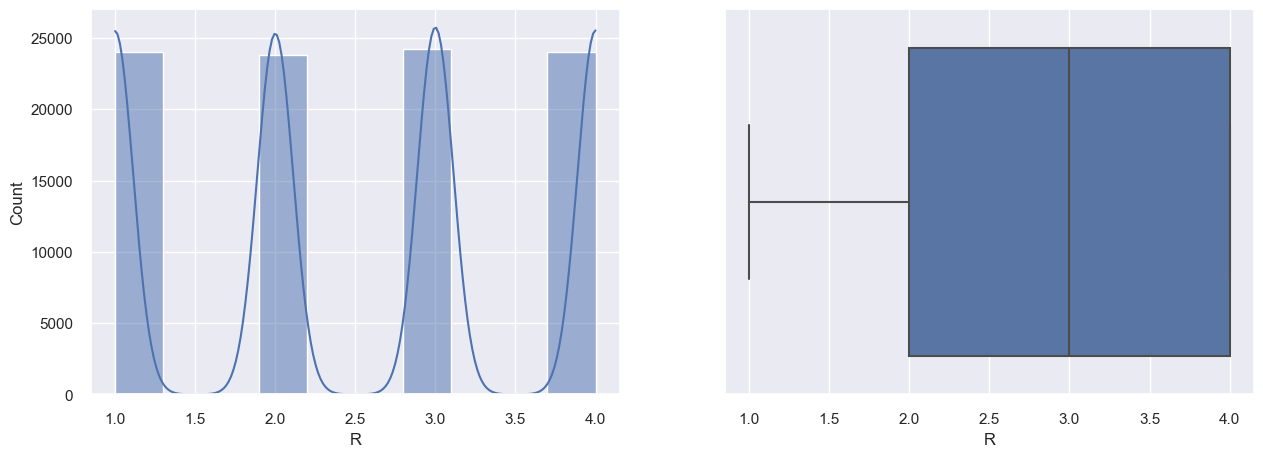

__________________________________________
R
__________________________________________
count    96096.000000
mean         2.502799
std          1.117878
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: R, dtype: float64
__________________________________________


In [11]:
# Distribution de la variable R avec displot et boxplot
sns.set_theme()
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
sns.histplot(data=data_rfm, x="R", kde=True, bins=10, ax=ax1)
sns.boxplot(data=data_rfm, x="R", ax=ax2, showfliers=False)
plt.show()

print('_'*42)
print('R')
print('_'*42)
print(data_rfm['R'].describe())
print('_'*42)

In [12]:
print('_'*42)
print('F')
print('_'*42)
print(data_rfm['F'].describe())
print('_'*42)

__________________________________________
F
__________________________________________
count    96096.000000
mean         1.093563
std          0.521476
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: F, dtype: float64
__________________________________________


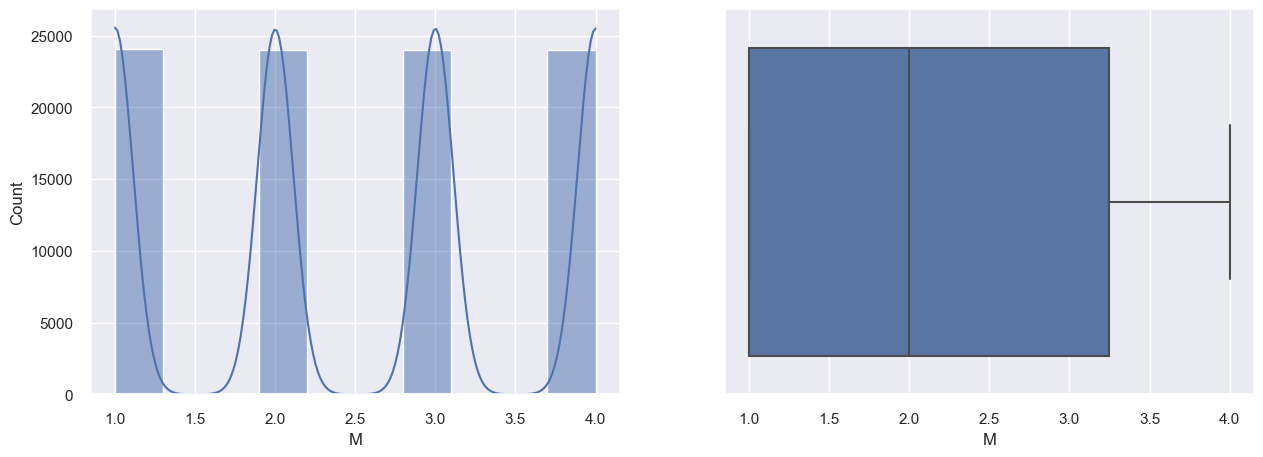

__________________________________________
M
__________________________________________
count    96096.000000
mean         2.499396
std          1.118551
min          1.000000
25%          1.000000
50%          2.000000
75%          3.250000
max          4.000000
Name: M, dtype: float64
__________________________________________


In [13]:
# Distribution de la variable M avec displot et boxplot
sns.set_theme()
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
sns.histplot(data=data_rfm, x="M", kde=True, bins=10, ax=ax1)
sns.boxplot(data=data_rfm, x="M", ax=ax2, showfliers=False)
plt.show()

print('_'*42)
print('M')
print('_'*42)
print(data_rfm['M'].describe())
print('_'*42)

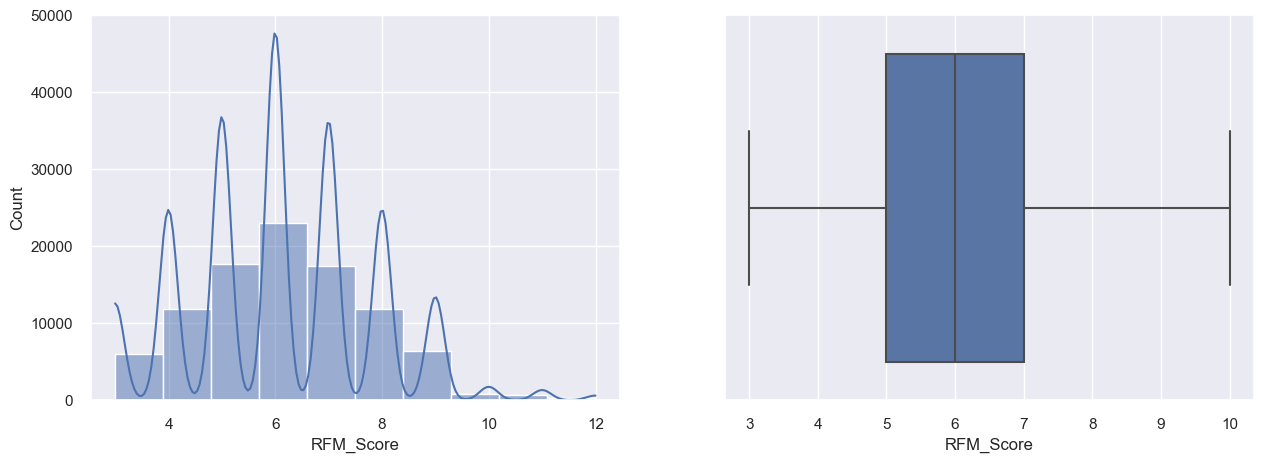

__________________________________________
RFM_Score
__________________________________________
count    96096.000000
mean         6.095758
std          1.710777
min          3.000000
25%          5.000000
50%          6.000000
75%          7.000000
max         12.000000
Name: RFM_Score, dtype: float64
__________________________________________


In [14]:
# Distribution de la variable RFM_Score avec displot et boxplot
sns.set_theme()
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
sns.histplot(data=data_rfm, x="RFM_Score", kde=True, bins=10, ax=ax1)
sns.boxplot(data=data_rfm, x="RFM_Score", ax=ax2, showfliers=False)
plt.show()

print('_'*42)
print('RFM_Score')
print('_'*42)
print(data_rfm['RFM_Score'].describe())
print('_'*42)

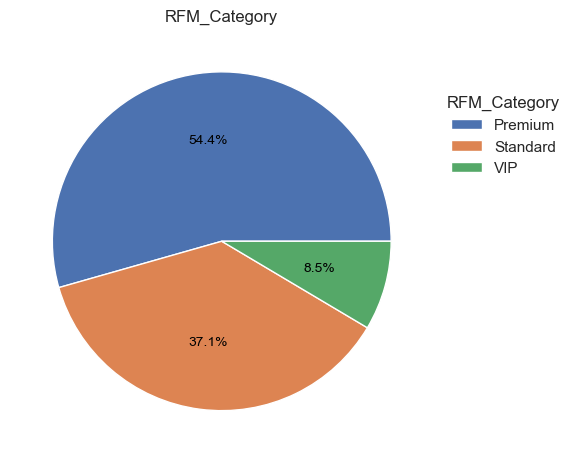

In [15]:
# Répartition des données de la variable RFM_Category
plt.title('RFM_Category', size=12)
wedges, texts, autotexts = plt.pie(data_rfm['RFM_Category'].value_counts(),
                                   autopct='%1.1f%%', textprops={'fontsize': 10, 
                                     'color' : 'Black'})
    
ax = plt.gca()
sns.set_theme()
ax.legend(wedges, data_rfm['RFM_Category'].unique(),
          title='RFM_Category',
          loc="center left",
          fontsize=11,
          bbox_to_anchor=(1, 0, 1, 1.5))
plt.show()

On a créé un nouveau jeu de données contenant uniquement les colonnes de Récence, Fréquence et ValeurMonétaire puis on a créé des quantiles pour chaque variable (Recency, Frequency, MonetaryValue) du jeu de données, on a définit également des fonctions pour attribuer des scores en fonction des quantiles. un score RFM global a été calculé pour chaque client en sommant les scores de Récence, Fréquence et Valeur Monétaire, et une catégorie ('VIP', 'Premium', 'Standard' et 'Needs Attention') a été attribuée à chaque client en fonction de son score RFM.

La distribution le boxplot de la variable RFM_score et les statistiques descriptives montre que La variable RFM_score semble être distribuée de manière relativement normale, avec une moyenne de 6 et une plage de valeurs allant de 3 à 12. La majorité des observations se situent entre 5 et 7, ce qui correspond aux quartiles 25% et 75%. L'écart-type de 1,71 indique que les valeurs sont relativement dispersées autour de la moyenne. Le boxplot suggère également que la distribution est symétrique et qu'il n'y a pas de valeurs aberrantes significatives.

La majorité des clients (54,4 %) ont un score RFM élevé et appartiennent à la catégorie "Premium". Environ 37,1 % des clients sont dans la catégorie "Standard", ce qui signifie qu'ils ont des scores RFM moyens. Seulement 8,5% des clients ont des scores RFM très élevés et appartiennent à la catégorie "VIP". Cette information peut aider à comprendre comment les clients interagissent avec l'entreprise et à prendre des décisions concernant les stratégies de marketing et de vente pour chaque catégorie de clients.


#### Clustering KMeans : RFM : Recency, Frequency, and Monetary Value 

On utilise la classe KElbowVisualizer pour sélectionner le nombre optimal de clusters à utiliser dans le modèle. Cette classe permet de visualiser les valeurs de la somme des distances au carré des points à leur centre de cluster (WCSS) pour différents nombres de clusters, afin de déterminer le "coude" dans le graphique, c'est-à-dire le point où l'ajout d'un autre cluster n'apporte plus une amélioration significative de la variance expliquée. 

La méthode Elbow et la métrique silhouette sont utilisées pour effectuer cette sélection. Le graphique obtenu permet de visualiser la courbe du WCSS pour différents nombres de clusters et d'identifier le nombre optimal de clusters pour le modèle.

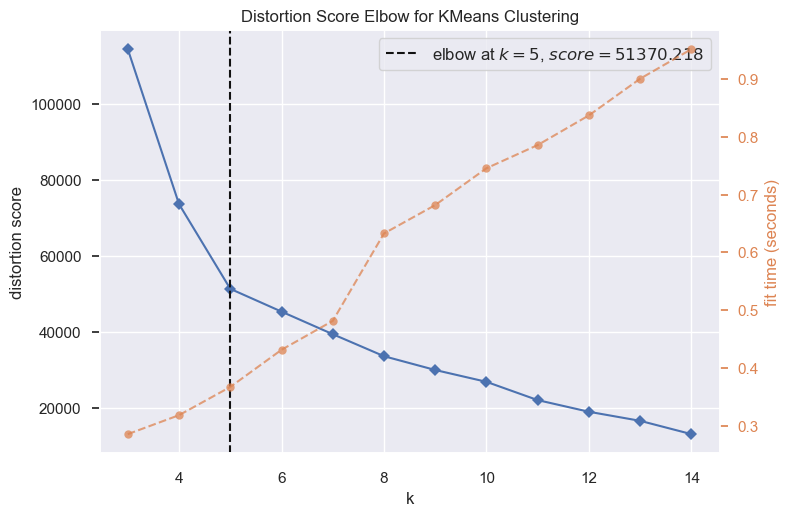

In [16]:

# Extraire les variables RFM du dataset
X_RFM = data_rfm[['R', 'F', 'M']]

# Définir le modèle KMeans
model = KMeans()

# Définir la classe KElbowVisualizer pour sélectionner le nombre optimal de clusters
visualizer = KElbowVisualizer(model, k=(3,15))

# Ajuster le modèle aux données RFM
visualizer.fit(X_RFM)

# Afficher le graphique pour sélectionner le nombre optimal de clusters
visualizer.poof()
visualizer.set_title("Sélection du nombre optimal de clusters avec la méthode Elbow et la métrique silhouette")


Le coude (Elbow) du graphique indique que le nombre optimal de clusters est égal à 5

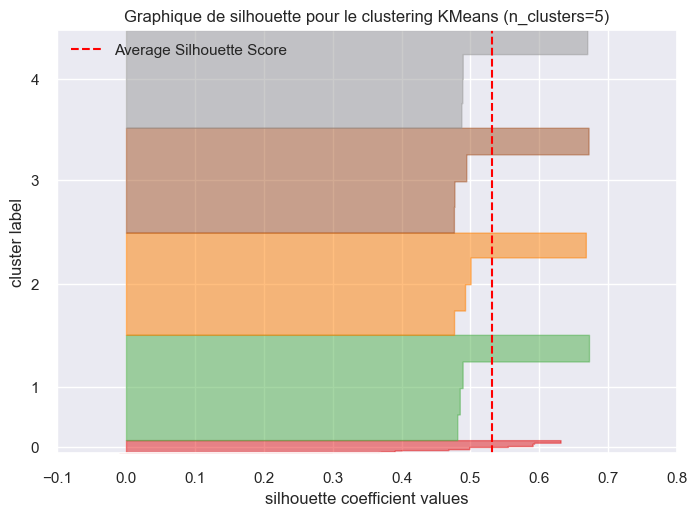

<AxesSubplot:title={'center':'Graphique de silhouette pour le clustering KMeans (n_clusters=5)'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [17]:
# Définir le modèle KMeans avec le nombre de clusters
model = KMeans(n_clusters=5)

# Définir le visualiseur SilhouetteVisualizer
visualizer = SilhouetteVisualizer(model)

# Adapter les données au visualiseur
visualizer.fit(X_RFM)

# Ajouter des annotations au graphique de silhouette
visualizer.ax.set_xlabel("Coefficient de silhouette")
visualizer.ax.set_ylabel("Étiquette de cluster")

# Définir le titre avec le nombre de clusters
visualizer.title = 'Graphique de silhouette pour le clustering KMeans (n_clusters=5)'

# Afficher le graphique
visualizer.poof()


Le coefficient de silhouette est une mesure de la qualité d'un clustering qui varie de -1 à 1. Dans ce cas le coefficient de silhouette est d'environ 0,53, il est donc considéré comme raisonnablement bon. Un coefficient de silhouette proche de 1 indique que les points de données sont bien regroupés dans leur propre cluster et sont très différents des points des autres clusters, tandis qu'un coefficient de silhouette proche de 0 indique que les points de données sont proches de la limite entre deux clusters.


In [18]:
pip install geopy


Note: you may need to restart the kernel to use updated packages.


In [19]:

# Créer une fonction pour calculer la distance entre deux points géographiques
def calc_distance(row):
    localisation_client = (row['latitude_client_mean'], row['longitude_client_mean'])
    localisation_vendeur = (row['latitude_vendeur_mean'], row['longitude_vendeur_mean'])
    return distance(localisation_client, localisation_vendeur).km

# Appliquer la fonction à chaque ligne du dataframe pour calculer la distance
data['distance_client_vendeur'] = data.apply(calc_distance, axis=1)


In [20]:
# supprimer les variables inutiles
data.drop(columns=['latitude_client_mean',
 'longitude_client_mean',
 'latitude_vendeur_mean',
 'longitude_vendeur_mean'], inplace=True)
# deplacer MonetaryValue après recency (position 3)
col = data.pop('MonetaryValue')
data.insert(3, 'MonetaryValue', col)
# Ajouter la colonne "numéro client" 
data.insert(loc=4, column='RFM_Score', value=data_rfm['RFM_Score'])
data

,numéro client,Frequency,Recency,MonetaryValue,RFM_Score,Rapidité_livraison_mean,review_score_mean,order_purchase_timestamp_first,order_purchase_timestamp_last,%_frais_livraison,distance_client_vendeur
0,0,1.0,160.0,141.90,8,4.0,5.0,2018-05-10 10:56:27,2018-05-10 10:56:27,9.237875,110.496092
1,1,1.0,163.0,27.19,6,4.0,4.0,2018-05-07 11:11:27,2018-05-07 11:11:27,43.862434,22.190341
2,2,1.0,585.0,86.22,4,1.0,3.0,2017-03-10 21:05:03,2017-03-10 21:05:03,24.956522,515.379484
3,3,1.0,369.0,43.62,4,11.0,4.0,2017-10-12 20:29:41,2017-10-12 20:29:41,67.833782,2468.983992
4,4,1.0,336.0,196.89,6,7.0,5.0,2017-11-14 19:45:42,2017-11-14 19:45:42,9.383333,154.744091
...,...,...,...,...,...,...,...,...,...,...,...
96091,96091,1.0,495.0,4134.84,6,26.0,5.0,2017-06-08 21:00:36,2017-06-08 21:00:36,31.682803,1990.407282
96092,96092,1.0,310.0,84.58,5,2.0,4.0,2017-12-10 20:07:56,2017-12-10 20:07:56,30.343658,1523.628196
96093,96093,1.0,617.0,112.46,4,29.0,5.0,2017-02-07 15:49:16,2017-02-07 15:49:16,25.094549,1524.922045
96094,96094,1.0,168.0,133.69,7,13.0,5.0,2018-05-02 15:17:41,2018-05-02 15:17:41,16.252174,638.851548


In [21]:
# Selectionner les colonnes RFM_Score', 'distance_client_vendeur', '%_frais_livraison', 'Rapidité_livraison_mean', 'review_score_mean'
data_score = data.loc[:, ['RFM_Score', 'MonetaryValue', 'distance_client_vendeur', '%_frais_livraison', 'Rapidité_livraison_mean', 'review_score_mean']]\
.rename(columns={'review_score_mean': 'Satisfaction'})
data_score

,RFM_Score,MonetaryValue,distance_client_vendeur,%_frais_livraison,Rapidité_livraison_mean,Satisfaction
0,8,141.90,110.496092,9.237875,4.0,5.0
1,6,27.19,22.190341,43.862434,4.0,4.0
2,4,86.22,515.379484,24.956522,1.0,3.0
3,4,43.62,2468.983992,67.833782,11.0,4.0
4,6,196.89,154.744091,9.383333,7.0,5.0
...,...,...,...,...,...,...
96091,6,4134.84,1990.407282,31.682803,26.0,5.0
96092,5,84.58,1523.628196,30.343658,2.0,4.0
96093,4,112.46,1524.922045,25.094549,29.0,5.0
96094,7,133.69,638.851548,16.252174,13.0,5.0


## R, F, M et Satisfaction : Agglomerative clustering   
## Visualisation des résultats de clustering hiérarchique avec des dendrogrammes


Nous avons ajouté la variable satisfaction à l'analyse RFM. Pour effectuer une segmentation hiérarchique agglomérative (HAC) des clients basée sur ces variables, on va utiliser des dendrogrammes, qui sont des diagrammes arborescents représentant les étapes de la fusion des groupes de clients. 

In [22]:
X_RFMS = X_RFM.copy()
X_RFMS['Satisfaction'] = data_score['Satisfaction']
X_RFMS

,R,F,M,Satisfaction
0,4,1,3,5.0
1,4,1,1,4.0
2,1,1,2,3.0
3,2,1,1,4.0
4,2,1,3,5.0
...,...,...,...,...
96091,1,1,4,5.0
96092,2,1,2,4.0
96093,1,1,2,5.0
96094,3,1,3,5.0


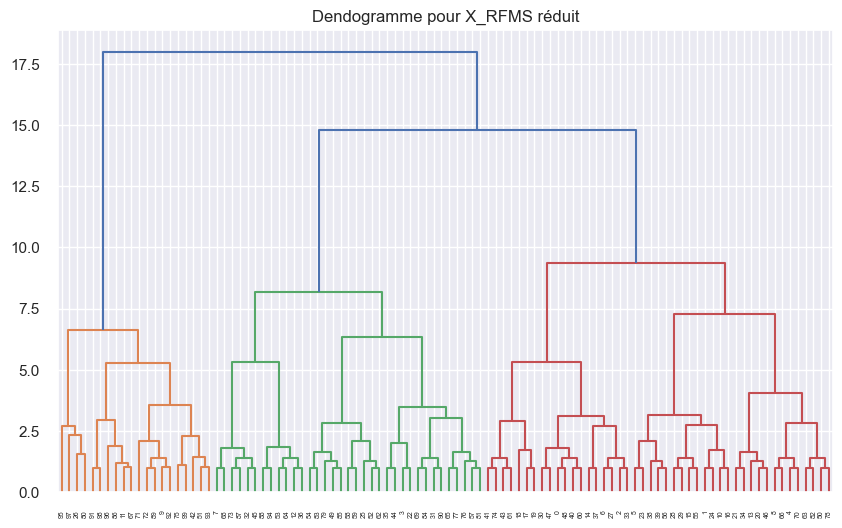

In [23]:
# Réduire le nombre de clients de X_RFMS à 100 en utilisant K-Means
# ==> Réduire le nombre de clients : 100 groupes de clients 
kmeans = KMeans(n_clusters=100, random_state=0).fit(X_RFMS)
X_reduit = kmeans.cluster_centers_

# Initialiser HAC
hac = AgglomerativeClustering(n_clusters=3).fit(X_reduit)

# Obtenir les labels de clusters de HAC
hac_labels = hac.labels_

# Calculer le score silhouette de HAC
silhouette_hac = silhouette_score(X_reduit, hac_labels)

# Construction du dendogramme
Z = linkage(X_reduit, 'ward')
plt.figure(figsize=(10, 6))
plt.title("Dendogramme pour X_RFMS réduit")
dendrogram(Z)
plt.show()


In [24]:
print('silhouette_hac', silhouette_hac)

silhouette_hac 0.27290790413268956


La méthode de clustering hiérarchique agglomérative (HAC) était plus lourde en termes de calculs et de temps d'exécution par rapport à K-Means. C'est pourquoi, dans ce code, nous avons commencé par réduire le nombre de clients du dataset X_RFMS à 100 groupes en utilisant K-Means. Cela nous a permis de travailler avec un sous-ensemble plus petit de données tout en préservant la structure de la variabilité des données.

Ensuite, nous avons initialisé la méthode de clustering hiérarchique agglomérative (HAC) à l'aide des centres de clusters calculés avec K-Means. Nous avons ensuite calculé les labels de clusters de HAC pour cette nouvelle répartition des clients. Pour évaluer la qualité de la segmentation, nous avons calculé le score de silhouette de HAC, qui était une mesure de la similarité des clients au sein de chaque cluster par rapport aux autres clusters. Un score de silhouette proche de 1 indiquait une bonne segmentation, tandis qu'un score proche de 0 indiquait une mauvaise segmentation.

Enfin, nous avons construit un dendogramme pour visualiser les résultats de clustering hiérarchique des 100 groupes de clients. Le dendogramme était un diagramme arborescent qui représentait les étapes de la fusion des groupes de clients. Il permettait de visualiser les différents niveaux de regroupement et de mettre en évidence les groupes de clients similaires. Le dendogramme nous a également aidé à déterminer le nombre optimal de clusters pour notre segmentation.




## DBSCAN : RFM : Recency, Frequency, and Monetary Value (reduit)

Par la suite, toujours avec les données R, F, M et Satisfaction, la méthode de clustering DBSCAN sera utilisée pour segmenter des données réduites en dimensionnalité à l'aide de l'analyse en composantes principales (PCA). Les valeurs optimales pour les paramètres eps et min_samples seront recherchées en calculant le score de silhouette pour différentes valeurs de ces paramètres. Ensuite, un graphique Elbow sera affiché pour visualiser ces scores et récupérer les valeurs optimales. Enfin, DBSCAN sera appliqué avec les valeurs optimales pour segmenter les données et afficher les résultats dans un graphique.

In [25]:
DBSCAN().get_params().keys()

dict_keys(['algorithm', 'eps', 'leaf_size', 'metric', 'metric_params', 'min_samples', 'n_jobs', 'p'])

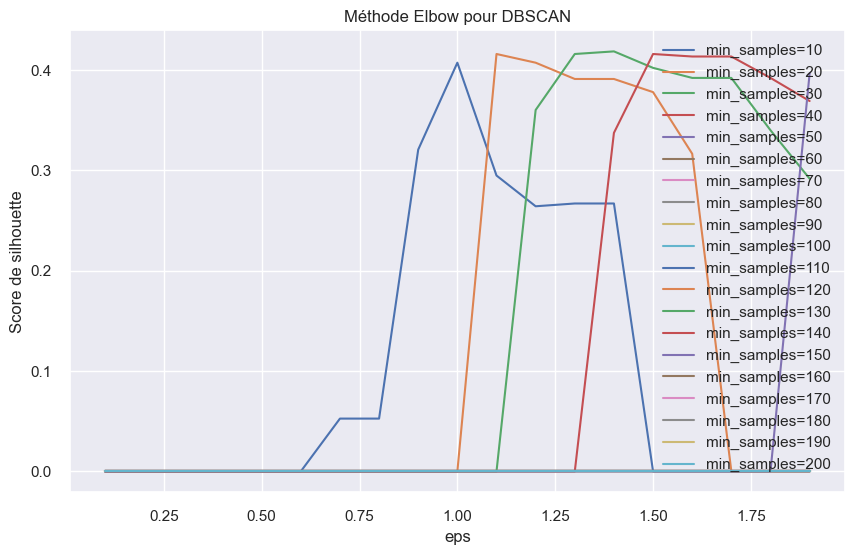

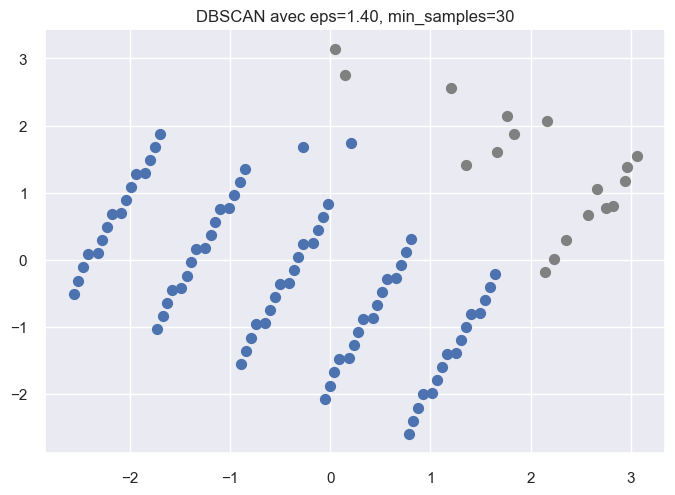

In [26]:
# Réduction de la dimensionnalité de l'ensemble de données en utilisant PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X_reduit)

# Recherche de l'eps optimal
eps_values = np.arange(0.1, 2.0, 0.1)
min_samples_values = np.arange(10, 201, 10)
silhouette_scores = np.zeros((len(eps_values), len(min_samples_values)))

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X)
        labels = dbscan.labels_
        if len(set(labels)) > 1:
            silhouette_scores[i, j] = silhouette_score(X, labels)
        else:
            silhouette_scores[i, j] = 0

# Affichage du graphique Elbow
fig = plt.figure(figsize=(10, 6))
for i in range(len(min_samples_values)):
    plt.plot(eps_values, silhouette_scores[:, i], label='min_samples=%d' % min_samples_values[i])
plt.xlabel('eps')
plt.ylabel('Score de silhouette')
plt.title('Méthode Elbow pour DBSCAN')
plt.legend()
plt.show()

# Récupération des valeurs optimales
best_eps_idx, best_min_samples_idx = np.unravel_index(np.argmax(silhouette_scores), silhouette_scores.shape)
best_eps = eps_values[best_eps_idx]
best_min_samples = min_samples_values[best_min_samples_idx]

# Application de DBSCAN avec les valeurs optimales
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan.fit(X)
labels = dbscan.labels_

# Affichage des résultats
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], c='gray', marker='o', s=50)
for i in range(np.max(labels) + 1):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], marker='o', s=50)
plt.title('DBSCAN avec eps=%.2f, min_samples=%d' % (best_eps, best_min_samples))
plt.show()


### Clustering KMeans : MonetaryValue, Distance_client_vendeur , %_frais_livraison, Rapidité_livraison_mean , Satisfaction

On a appliqué un Clustering KMeans sur les données Distance_client_vendeur, %_frais_livraison, Rapidité_livraison_mean et Satisfaction. Pour déterminer le nombre optimal de clusters à utiliser dans le modèle, on a utilisé la classe KElbowVisualizer. Selon le graphique coude (Elbow), le nombre optimal de clusters est de 7. Pour évaluer la qualité des clusters obtenus pour différents nombres de clusters, on a également utilisé la métrique silhouette, dont le coefficient est d'environ 0,52.

On a également effectué une réduction de la dimensionnalité des données en utilisant PCA avec 3 composantes, ajusté un modèle (non spécifié), récupéré les labels de chaque point et affiché les points dans un scatter plot en 3D en utilisant ces labels pour la coloration. Le nombre de clusters a été affiché ainsi que les statistiques des clusters.

Le 'Clustering' des clients en fonction de leur éloignement géographique des vendeurs facilite la compréhension et l'analyse des facteurs qui peuvent influencer leur décision d'achat, tels que la souplesse, les coûts de transport  et la disponibilité des produits. 

Cette segmentation aide également à l'identification des groupes de clients qui préfèrent acheter auprès de vendeurs proches de chez eux, et ceux qui sont prêts à s'éloigner davantage pour trouver des offres intéressantes.  Elle sera utile pour la sélection des canaux de distribution les plus appropriés et la planification des campagnes de marketing pour chaque groupe de clients.

La variable %_frais_livraison est une variable qui mesure le pourcentage de frais de livraison facturé au client par rapport au coût total de la commande. Cela peut varier en fonction du service de livraison utilisé, de la distance entre le client et le vendeur, du poids de la commande.... C'est une variable importante pour les entreprises qui cherchent à optimiser leurs coûts de livraison tout en maintenant la satisfaction de leurs clients. Dans le contexte de l'analyse de données, cette variable peut être utilisée pour identifier des segments de clients qui ont des comportements d'achat similaires en fonction des frais de livraison facturés.

La variable Rapidité_livraison peut être considérée comme importante dans l'analyse des données de livraison, car un temps de livraison rapide peut contribuer à améliorer la satisfaction des clients et à les fidéliser, tandis qu'un temps de livraison lent peut entraîner une insatisfaction et une perte de clients. De plus, une analyse de clustering basée sur la Rapidité_livraison peut aider à identifier les groupes de clients qui ont des attentes de livraison similaires et à adapter les stratégies de livraison en conséquence. Par conséquent, la Rapidité_livraison peut être une variable clé pour améliorer les performances en matière de livraison et à maximiser la satisfaction des clients.

In [27]:
X_DLRS = data_score.copy()
X_DLRS['Satisfaction'] = data_score['Satisfaction']
# supprimer les variables inutiles
X_DLRS.drop(columns=['RFM_Score'], inplace=True)
X_DLRS

,MonetaryValue,distance_client_vendeur,%_frais_livraison,Rapidité_livraison_mean,Satisfaction
0,141.90,110.496092,9.237875,4.0,5.0
1,27.19,22.190341,43.862434,4.0,4.0
2,86.22,515.379484,24.956522,1.0,3.0
3,43.62,2468.983992,67.833782,11.0,4.0
4,196.89,154.744091,9.383333,7.0,5.0
...,...,...,...,...,...
96091,4134.84,1990.407282,31.682803,26.0,5.0
96092,84.58,1523.628196,30.343658,2.0,4.0
96093,112.46,1524.922045,25.094549,29.0,5.0
96094,133.69,638.851548,16.252174,13.0,5.0


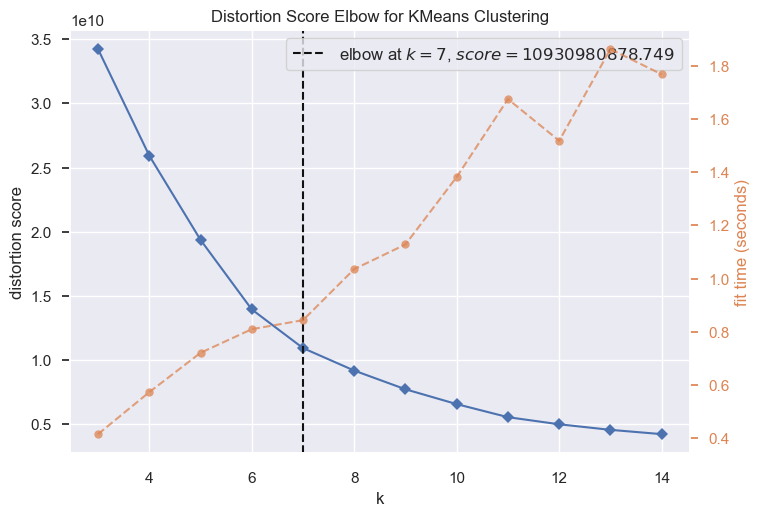

In [28]:
# Réduction de la dimensionnalité de l'ensemble de données X_DLRS en utilisant PCA
pca = PCA(n_components=3)
X = pca.fit_transform(X_DLRS)

# Définir le modèle KMeans
model = KMeans()

# Définir la classe KElbowVisualizer pour sélectionner le nombre optimal de clusters
visualizer = KElbowVisualizer(model, k=(3,15))

# Ajuster le modèle aux données RFM
visualizer.fit(X)

# Afficher le graphique pour sélectionner le nombre optimal de clusters
visualizer.poof()
visualizer.set_title("Sélection du nombre optimal de clusters avec la méthode Elbow et la métrique silhouette")


### Projection 3 D :  

Nombre de clusters : 7


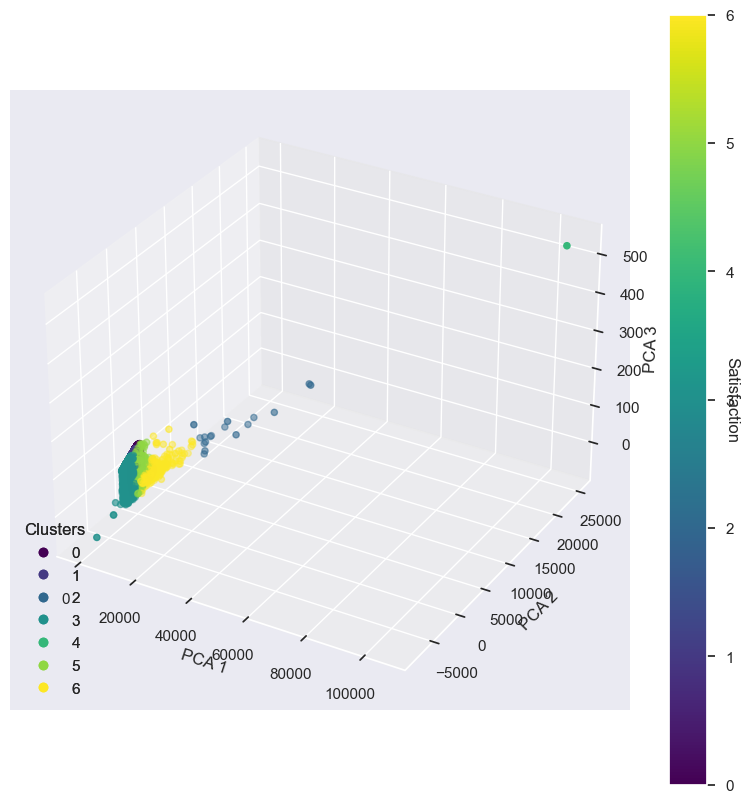

In [29]:
# Définir le modèle KMeans avec le nombre de clusters
model = KMeans(n_clusters=7)

# Ajustement de l'algorithme aux données
model.fit(X)

# Récupération des labels de chaque point
labels = model.labels_

# Affichage des points dans un scatter plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

# Ajout d'une légende
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Clusters")
ax.add_artist(legend1)
cbar = fig.colorbar(scatter, ax=ax)
cbar.ax.set_ylabel('Satisfaction', rotation=270)

# Affichage des statistiques des clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Nombre de clusters : {n_clusters}')

plt.show()


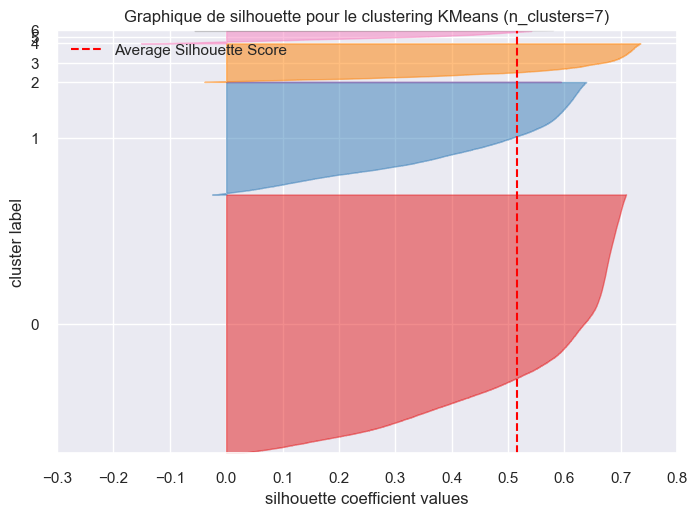

<AxesSubplot:title={'center':'Graphique de silhouette pour le clustering KMeans (n_clusters=7)'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [30]:
# Définir le visualiseur SilhouetteVisualizer
visualizer = SilhouetteVisualizer(model)

# Adapter les données au visualiseur
visualizer.fit(X)

# Ajouter des annotations au graphique de silhouette
visualizer.ax.set_xlabel("Coefficient de silhouette")
visualizer.ax.set_ylabel("Étiquette de cluster")

# Définir le titre avec le nombre de clusters
visualizer.title = 'Graphique de silhouette pour le clustering KMeans (n_clusters=7)'

# Afficher le graphique
visualizer.poof()

###   PCA : RFM_Score ,  MonetaryValue, distance_client_vendeur , %_frais_livraison, Rapidité_livraison_mean , Satisfaction

Dans cette partie de l'analyse en composantes principales on va s'inspirer des cours d'OpenClassrooms https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees/5345201-tp-realisez-une-acp:

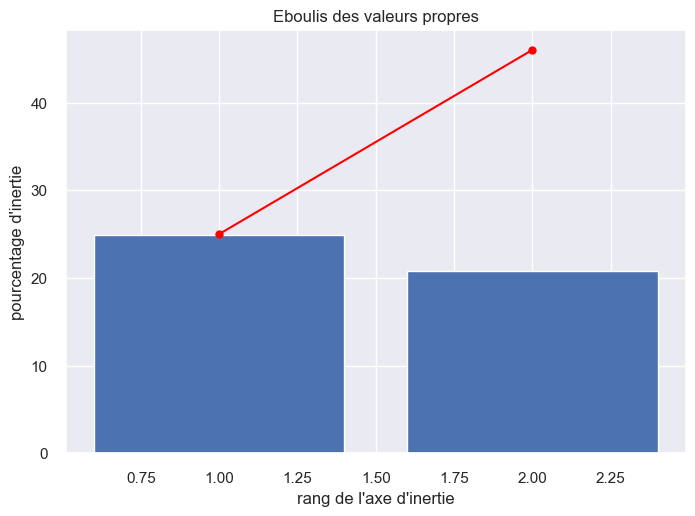

In [31]:
# Définir la matrice des données
X = data_score

# scaler les données
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# Définir pca avec le nombre de composantes :
n_components = 2
pca = PCA(n_components=n_components)
# entrainer sur les données scalées : 
pca.fit(X_scaled)
# variance pour chaque composante. 
pca.explained_variance_ratio_
scree = (pca.explained_variance_ratio_*100).round(2)
scree
# somme cumulée numpy avec la fonction cumsum :
scree_cum = scree.cumsum().round()
scree_cum
# Définissons ensuite une variable avec la liste des composantes : 
x_list = range(1, n_components+1)
list(x_list)

# visualisation de l'Eboulis des valeurs propres
sns.set_theme()
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)


En bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée. On voit ici le premier plan factoriel représente plus de 50 % de l’inertie totale.

<AxesSubplot:>

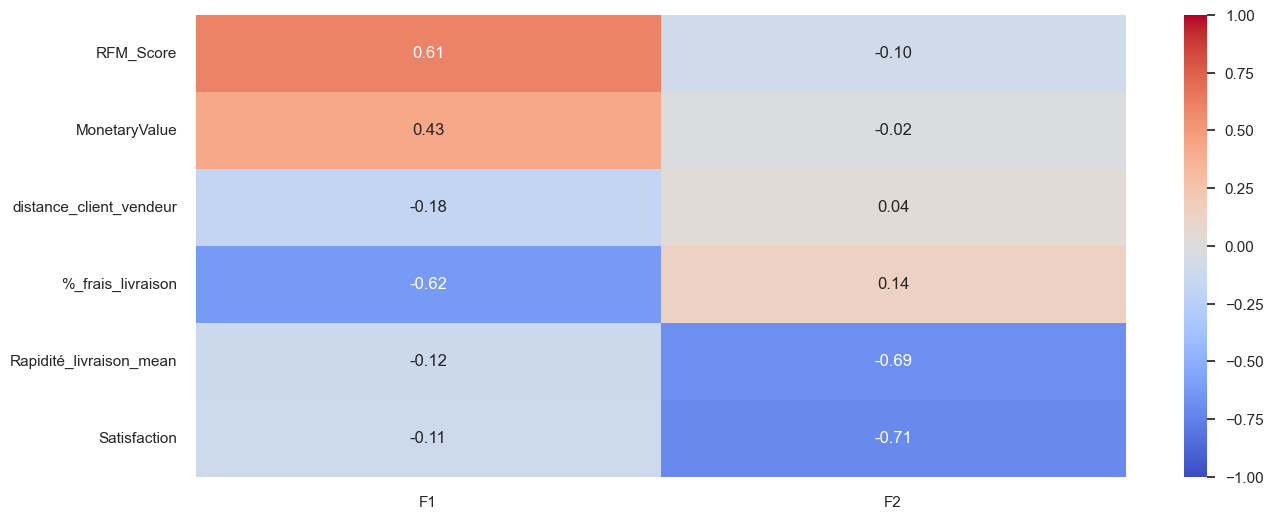

In [32]:
# définir la variable pcs :
pcs = pca.components_
pcs = pd.DataFrame(pcs)
# définir les variables
pcs.columns = data_score.columns
pcs.index = [f"F{i}" for i in x_list]
# arrondir les résultats pour simplifier l'analyse 
pcs.round(2)
# afficher de façon graphique 
sns.set_theme()
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

In [33]:
# définir une fonction pour afficher la contribution de chaque variable aux composantes principales
sns.set_theme()
def contribution_graph(pca, 
                      x_y, 
                      variables_ACP): 
    """Affiche le graphe des correlations"""
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                variables_ACP[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))
    
    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

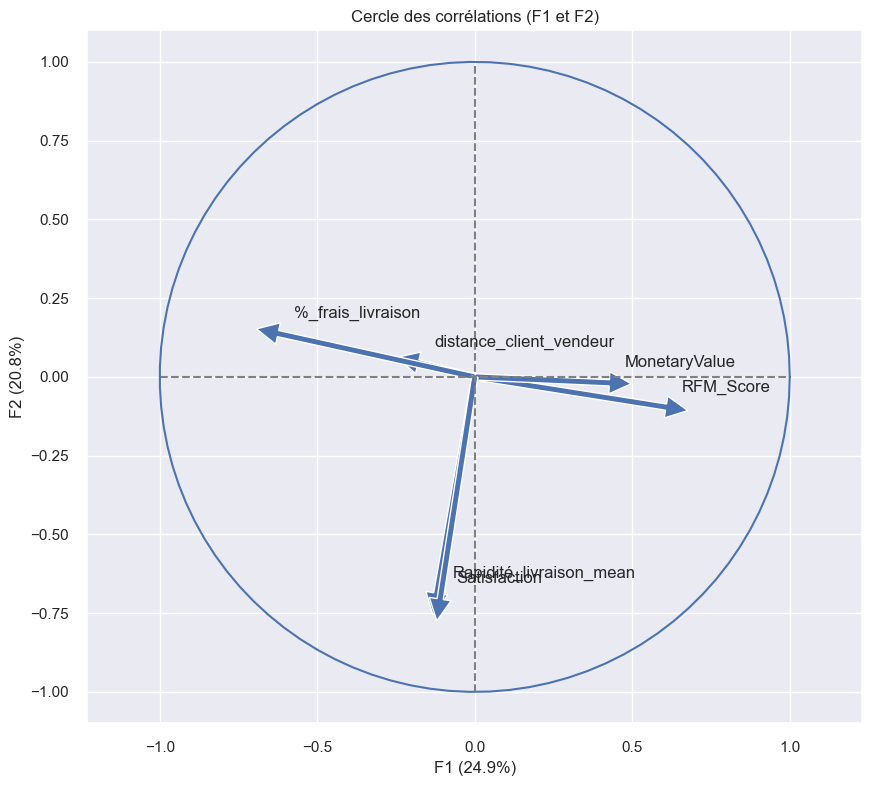

In [34]:
# Appliquer la fonction sur F1 et F2  et préciser 0 et 1 pour F1 et F2
x_y = (0,1)
# Appliquer la fonction sur F1 et F2 
sns.set_theme()
contribution_graph(pca, x_y, data_score.columns)

On peut constater une corrélation entre la rapidité de livraison et la satisfaction des clients. Cette corrélation peut être expliquée par le fait que la rapidité de livraison est souvent un critère important pour les clients, et qu'une livraison rapide peut contribuer à améliorer leur expérience d'achat en ligne. 

In [35]:
# Projection
# calcul les coordonnées dans le nouvel espace 
X_proj = pca.transform(X_scaled)
X_proj[:5]
# dfinir une fonction pour afficher la projection
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points f clusters is No
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    # c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection (sur F{x+1} et F{y+1})")
    sns.set_theme()
    plt.show()

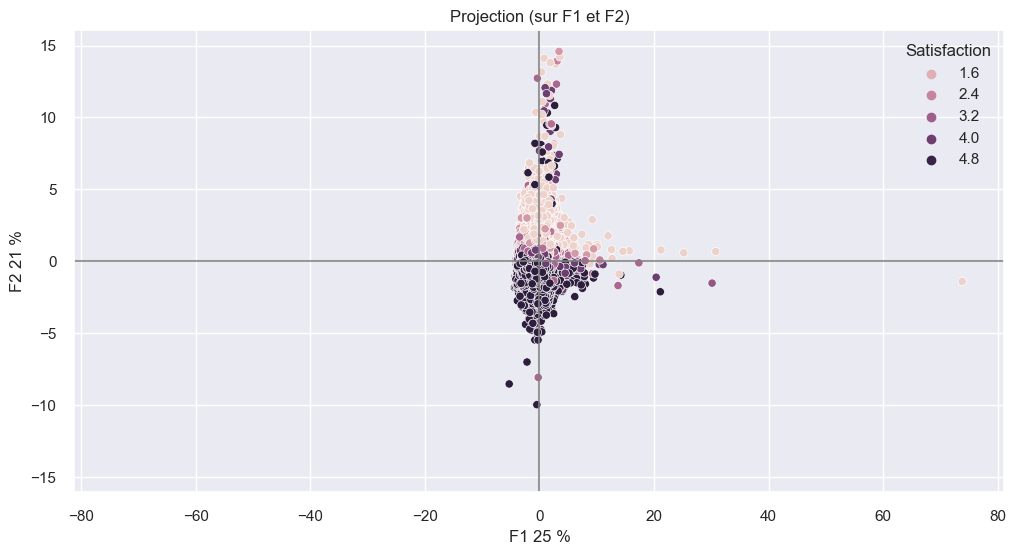

In [36]:
# Appliquer la fonction sur F1 et F2 
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, figsize=(12,6), clusters = data_score['Satisfaction'], marker="o")

### KMeans: 
### RFM_Score ,  MonetaryValue, distance_client_vendeur , %_frais_livraison, Rapidité_livraison_mean , Satisfaction

On a appliqué un Clustering KMeans également sur les données RFM_Score , MonetaryValue, distance_client_vendeur , %_frais_livraison, Rapidité_livraison_mean , Satisfaction. Pour déterminer le nombre optimal de clusters à utiliser dans le modèle, on a utilisé la classe KElbowVisualizer. Selon le graphique coude (Elbow), le nombre optimal de clusters est de 7. Pour évaluer la qualité des clusters obtenus pour différents nombres de clusters, on a également utilisé la métrique silhouette, dont le coefficient est d'environ 0,51.


In [37]:
data_score

,RFM_Score,MonetaryValue,distance_client_vendeur,%_frais_livraison,Rapidité_livraison_mean,Satisfaction
0,8,141.90,110.496092,9.237875,4.0,5.0
1,6,27.19,22.190341,43.862434,4.0,4.0
2,4,86.22,515.379484,24.956522,1.0,3.0
3,4,43.62,2468.983992,67.833782,11.0,4.0
4,6,196.89,154.744091,9.383333,7.0,5.0
...,...,...,...,...,...,...
96091,6,4134.84,1990.407282,31.682803,26.0,5.0
96092,5,84.58,1523.628196,30.343658,2.0,4.0
96093,4,112.46,1524.922045,25.094549,29.0,5.0
96094,7,133.69,638.851548,16.252174,13.0,5.0


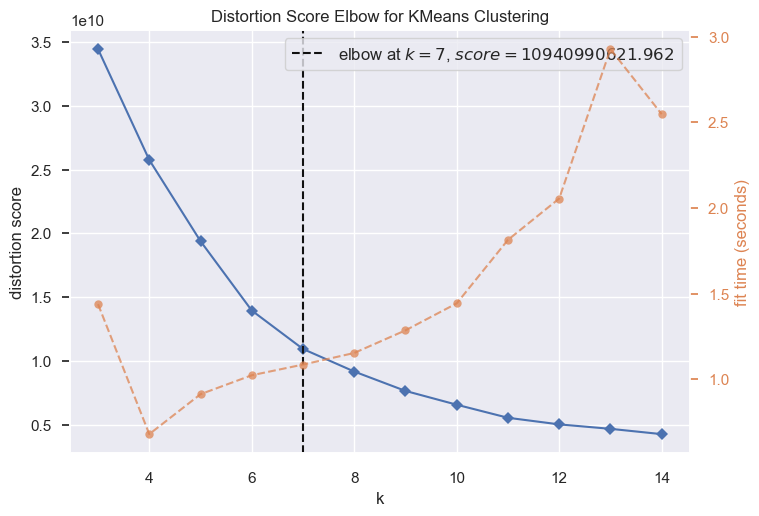

In [38]:
# Définir le modèle KMeans
model = KMeans()

# Définir la classe KElbowVisualizer pour sélectionner le nombre optimal de clusters
visualizer = KElbowVisualizer(model, k=(3,15))

# Ajuster le modèle aux données RFM
visualizer.fit(data_score)

# Afficher le graphique pour sélectionner le nombre optimal de clusters
visualizer.poof()
visualizer.set_title("Sélection du nombre optimal de clusters avec la méthode Elbow et la métrique silhouette")


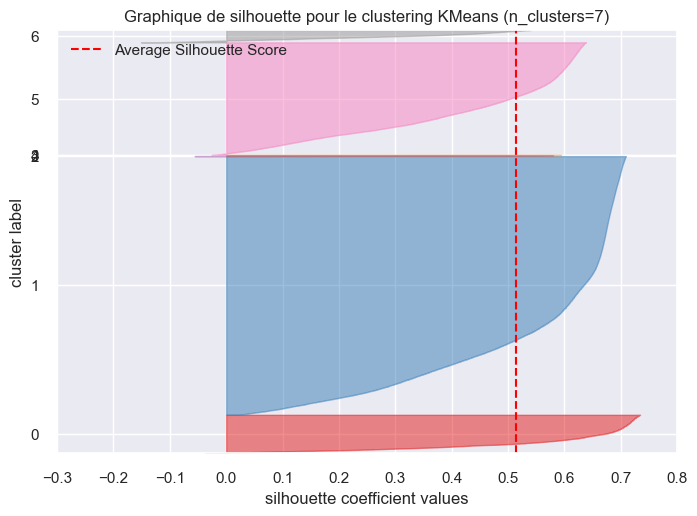

<AxesSubplot:title={'center':'Graphique de silhouette pour le clustering KMeans (n_clusters=7)'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [39]:
# Définir le modèle KMeans avec le nombre de clusters
model = KMeans(n_clusters=7)

# Définir le visualiseur SilhouetteVisualizer
visualizer = SilhouetteVisualizer(model)

# Adapter les données au visualiseur
visualizer.fit(data_score)

# Ajouter des annotations au graphique de silhouette
visualizer.ax.set_xlabel("Coefficient de silhouette")
visualizer.ax.set_ylabel("Étiquette de cluster")

# Définir le titre avec le nombre de clusters
visualizer.title = 'Graphique de silhouette pour le clustering KMeans (n_clusters=7)'

# Afficher le graphique
visualizer.poof()


### Projection 3 D :  RFM_Score , MonetaryValue, distance_client_vendeur , %_frais_livraison, Rapidité_livraison_mean , Satisfaction

Nombre de clusters : 7


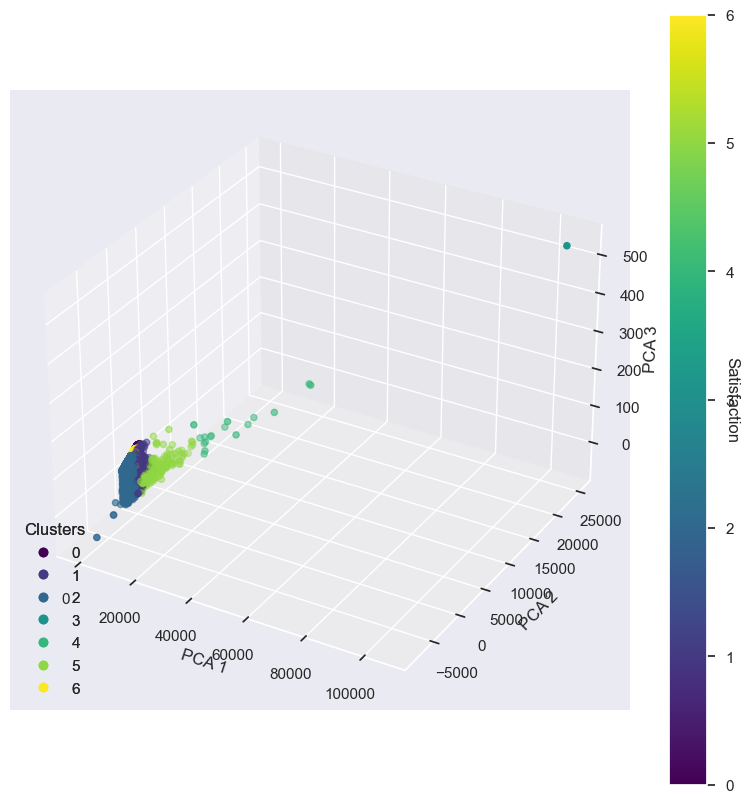

In [40]:

# Réduction de la dimensionnalité de l'ensemble de données en utilisant PCA
pca = PCA(n_components=3)
X = pca.fit_transform(data_score)

# Ajustement de l'algorithme aux données
model.fit(X)

# Récupération des labels de chaque point
labels = model.labels_

# Affichage des points dans un scatter plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

# Ajout d'une légende
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Clusters")
ax.add_artist(legend1)
cbar = fig.colorbar(scatter, ax=ax)
cbar.ax.set_ylabel('Satisfaction', rotation=270)

# Affichage des statistiques des clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Nombre de clusters : {n_clusters}')

plt.show()


Nombre de clusters : 7


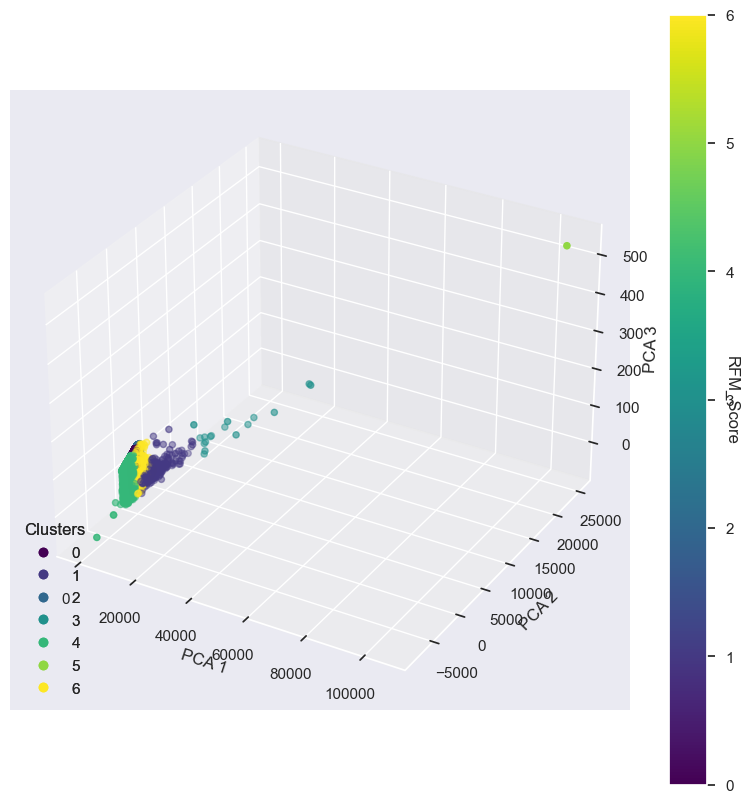

In [41]:

# Réduction de la dimensionnalité de l'ensemble de données en utilisant PCA
pca = PCA(n_components=3)
X = pca.fit_transform(data_score)

# Ajustement de l'algorithme aux données
model.fit(X)

# Récupération des labels de chaque point
labels = model.labels_

# Affichage des points dans un scatter plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

# Ajout d'une légende
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Clusters")
ax.add_artist(legend1)
cbar = fig.colorbar(scatter, ax=ax)
cbar.ax.set_ylabel('RFM_Score', rotation=270)

# Affichage des statistiques des clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Nombre de clusters : {n_clusters}')

plt.show()


### Interprétation des différents clusters
#### En fonction de : RFM_Score', 'distance_client_vendeur', '%_frais_livraison', 'Rapidité_livraison_mean', 'Satisfaction'

Il est important d'interpréter pour mieux comprendre les caractéristiques des groupes de clients (clusters). Pour cela, il est possible d'utiliser des graphiques comme les boxplots et les diagrammes de Kiviat.

Les diagrammes de Kiviat permettent de comparer les moyennes de chaque variable entre les clusters. Ces outils permettent ainsi d'identifier les caractéristiques de chaque cluster, ce qui peut aider les entreprises à mieux comprendre les besoins et les comportements de leurs clients. Dans ce cas-ci, les variables utilisées sont: RFM_Score, distance_client_vendeur, %_frais_livraison, Rapidité_livraison_mean et Satisfaction.

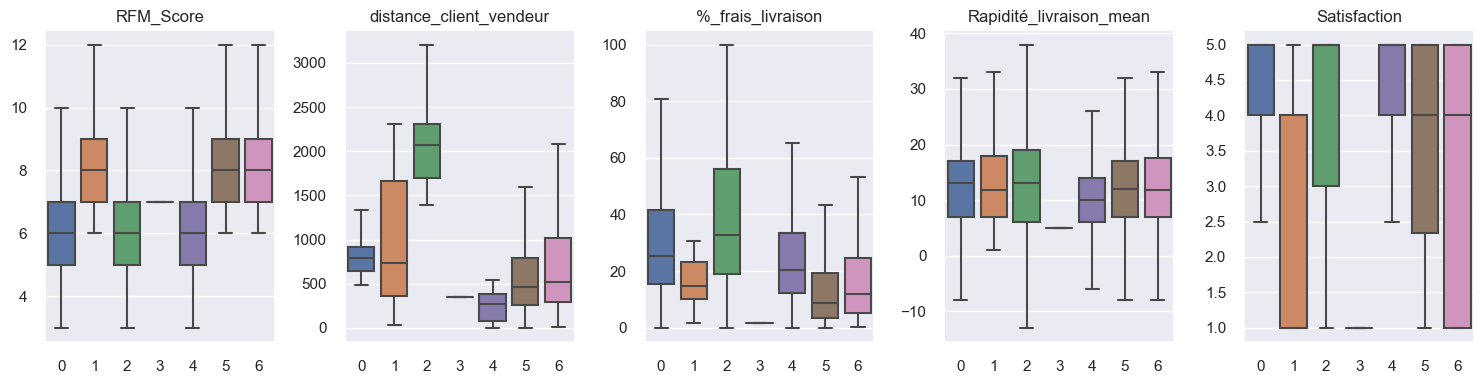

In [58]:

# Effectuer le clustering avec l'algorithme KMeans
model = KMeans(n_clusters=7)
cluster_labels = model.fit_predict(data_score)
df_cluster = data_score.copy()
df_cluster['cluster'] = cluster_labels

# Tracer les boxplots pour chaque variable
fig, axs = plt.subplots(1, 5, figsize=(15, 4))

variables = ['RFM_Score', 'distance_client_vendeur', '%_frais_livraison', 'Rapidité_livraison_mean', 'Satisfaction']

for i, var in enumerate(variables):
    sns.boxplot(x="cluster", y=var, data=df_cluster, orient="vertical", showfliers=False, ax=axs[i])
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    axs[i].set_title(var)

plt.tight_layout()
plt.show()


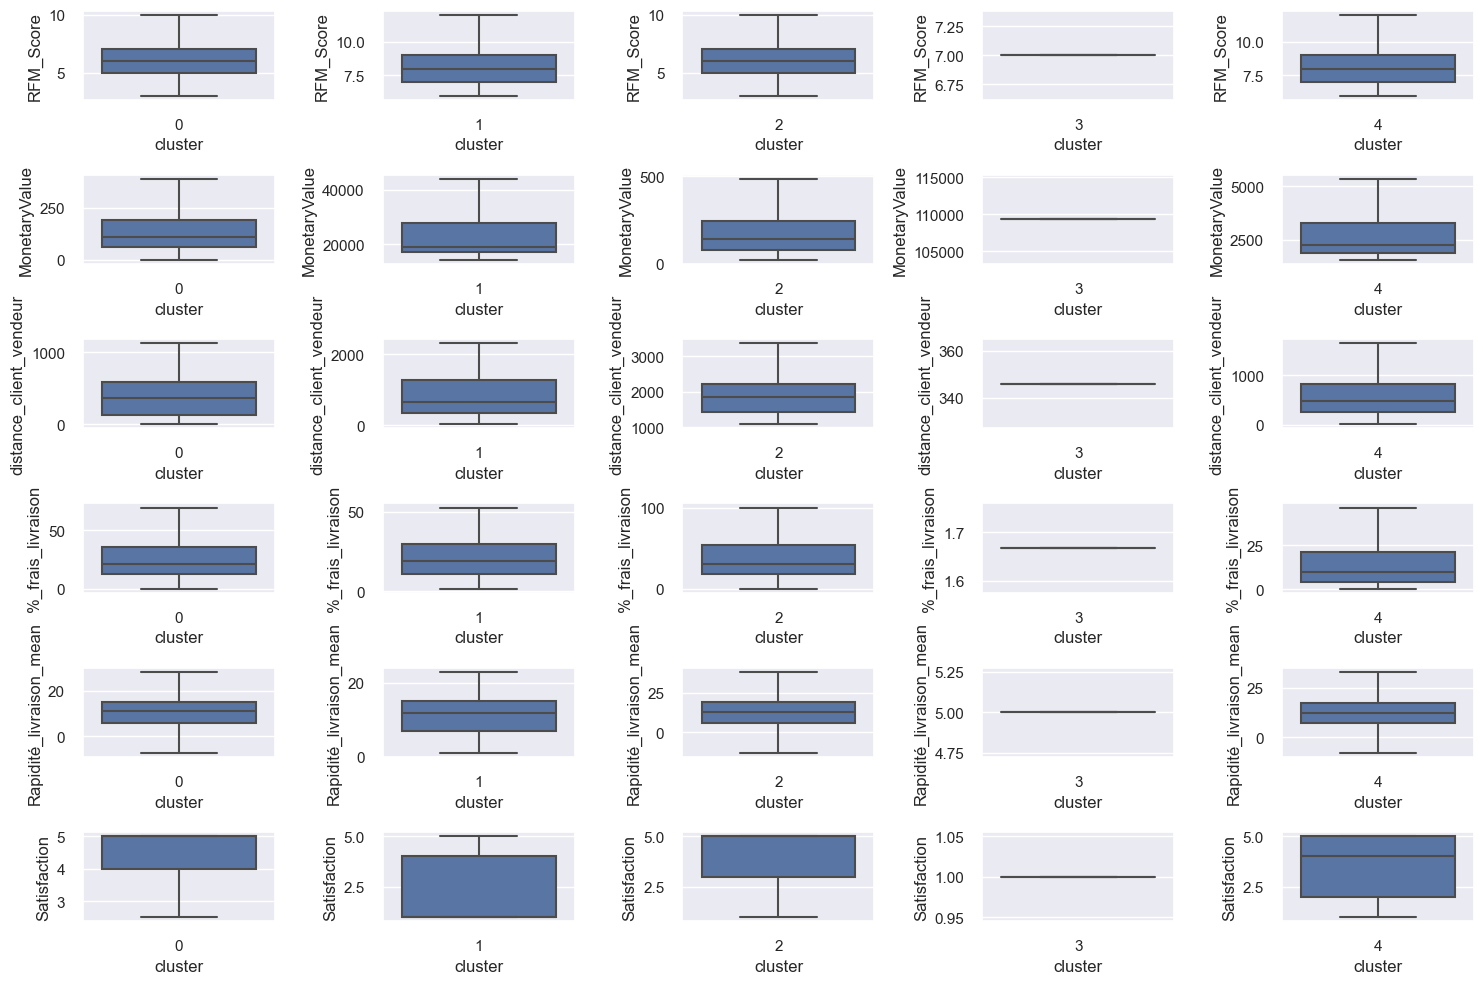

In [43]:
# Effectuer le clustering avec l'algorithme KMeans
model = KMeans(n_clusters=5)
cluster_labels = model.fit_predict(data_score)
df_cluster = data_score.copy()
df_cluster['cluster'] = cluster_labels

# Tracer les boxplots pour chaque variable par cluster
fig, axs = plt.subplots(nrows=len(df_cluster.columns)-1, ncols=5, figsize=(15, 10))
for i, col in enumerate(df_cluster.columns[:-1]):
    for j in range(5):
        sns.boxplot(data=df_cluster[df_cluster['cluster'] == j], x='cluster', y=col, ax=axs[i,j], showfliers=False)
plt.tight_layout()
plt.show()


### Diagramme de Kiviat : 
#### En fonction de : RFM_Score', 'distance_client_vendeur', '%_frais_livraison', 'Rapidité_livraison_mean', 'Satisfaction'

Les Diagrammes de Kiviat sont utiles pour comparer les différentes caractéristiques ou dimensions de chaque cluster. 

Le diagramme de Kiviat, diagramme en radar, en étoile ou encore en toile d'araignée sert à représenter sur un plan en deux dimensions au moins trois ensembles de données multivariées. Chaque axe, qui part d'un même point, représente une caractéristique quantifiée. 

Ils permettent de visualiser les différences entre les clusters en termes de valeurs relatives pour chaque dimension. Dans un diagramme de Kiviat, chaque dimension ou caractéristique est représentée par un axe radial, et les valeurs de chaque cluster pour cette dimension sont représentées par une ligne ou une forme géométrique (par exemple, un polygone).

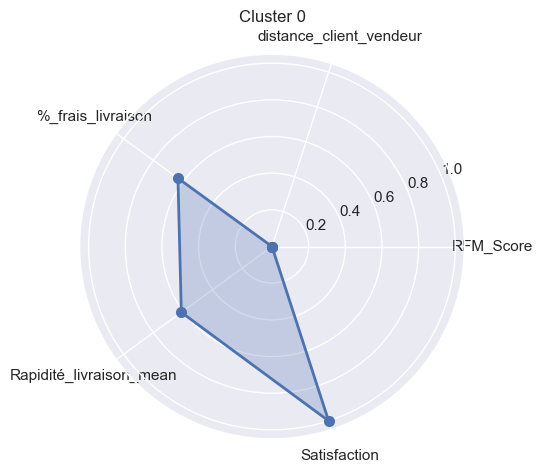

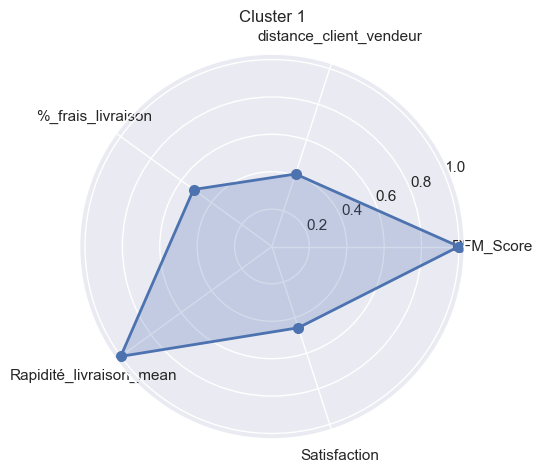

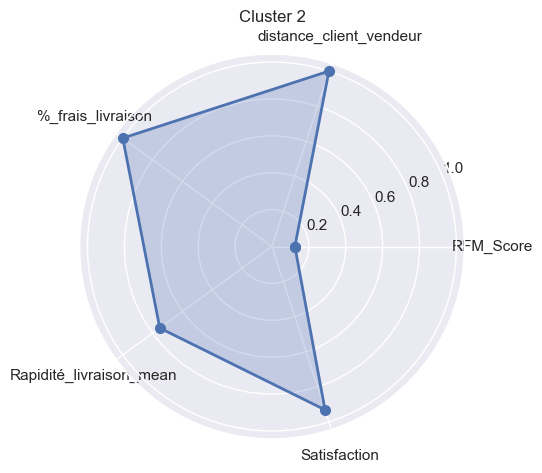

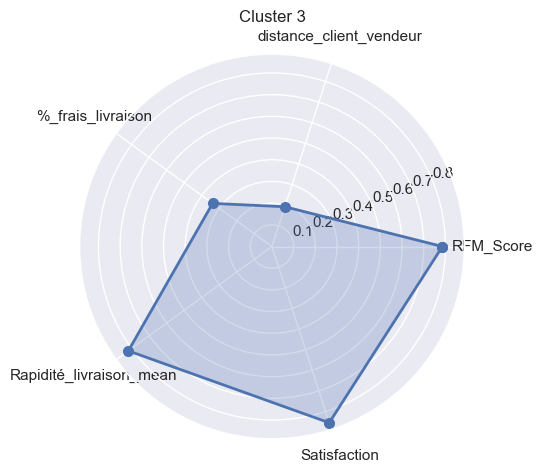

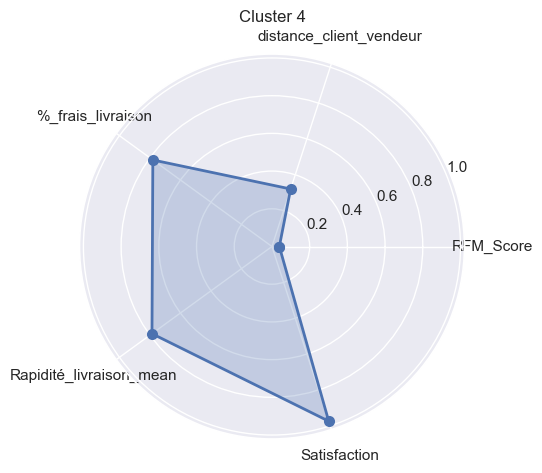

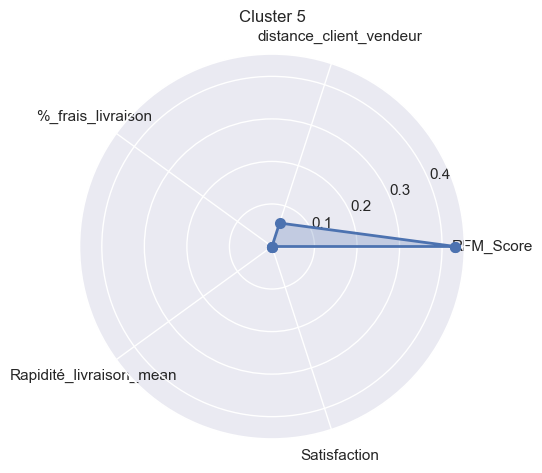

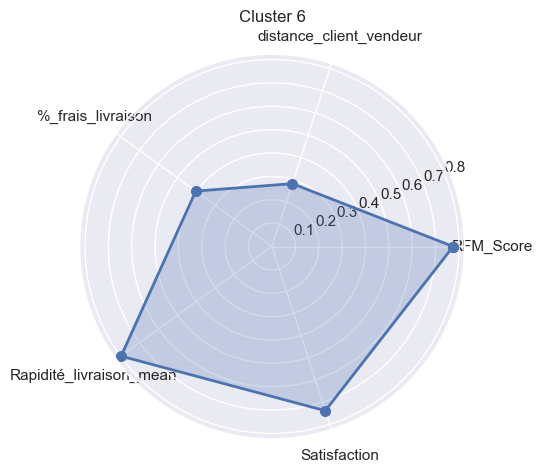

In [56]:


# Effectuer le clustering avec l'algorithme KMeans
model = KMeans(n_clusters=7)
cluster_labels = model.fit_predict(data_score)
df_cluster = data_score.copy()
df_cluster['cluster'] = cluster_labels

# Variables utilisées dans le graphique Kiviat
variables = ['RFM_Score', 'distance_client_vendeur', '%_frais_livraison', 'Rapidité_livraison_mean', 'Satisfaction']

# Calculer les moyennes des variables pour chaque cluster
cluster_means = df_cluster.groupby('cluster')[variables].mean()

# Normaliser les données pour les utiliser dans le graphique Kiviat
cluster_norm = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())

# Paramètres pour le graphique Kiviat
categories=list(cluster_norm)
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Créer le graphique Kiviat pour chaque cluster
for i in range(model.n_clusters):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111, polar=True)
    
    values = cluster_norm.iloc[i].tolist()
    values += values[:1]
    
    ax.plot(angles, values, 'o-', linewidth=2, markersize=8)
    ax.fill(angles, values, alpha=0.25)
    
    ax.set_thetagrids(np.array(angles[:-1]) * 180/np.pi, categories)

    ax.set_title(f"Cluster {i}")
    
    ax.grid(True)
    
plt.show()


- Cluster 0 : les clients de ce cluster sont principalement satisfaits de leur expérience d'achat,les valeurs de des deux variables distance_client_vendeur et RFM_score sont faibles par rapport à la variable satisfaction.

- Clutser 1 : présente des valeurs élevées pour la rapidité de livraison et RFM_Score mais ne sont pas très satisfait de leur expérience d'achat.

- Cluster 2 : Le cluster 2 présente les clients satisfaits et proches des vendeurs et ont donné de bonnes notes pour la rapidité de livraison et le % de frais de livraison.

- Cluster 3 : Le cluster 3 présente de bonnes valeurs pour les dimensions  RFM Score, la rapidité de livraison et sont principalement satisfaits de leur expérience d'achat.

- Cluster 4 : Le cluster 4, selon les résultats du clustering, se caractérise par des valeurs importantes pour la satisfaction et de bonne valeurs lesdeux dimensions RFM_Score rapidité et % de frais de livraison.

- Cluster 5 : Le cluster 5 presente des valeurs élevées pour le RFM_Score.

- Cluster 6 : Le cluster 6 presente est proche des clients de cluster 3 et présente de bonnes valeurs pour les dimensions  RFM Score / rapidité de livraison et ses clients sont principalement satisfaits de leur expérience d'achat.







In [45]:
# Selectionner les colonnes RFM_Score', 'distance_client_vendeur', '%_frais_livraison', 'Rapidité_livraison_mean', 'review_score_mean'
data_score = data.loc[:, ['Recency', 'Frequency', 'MonetaryValue', 'RFM_Score', 'MonetaryValue', 'distance_client_vendeur', '%_frais_livraison', 'Rapidité_livraison_mean', 'review_score_mean']]\
.rename(columns={'review_score_mean': 'Satisfaction'})
data_score

,Recency,Frequency,MonetaryValue,RFM_Score,MonetaryValue,distance_client_vendeur,%_frais_livraison,Rapidité_livraison_mean,Satisfaction
0,160.0,1.0,141.90,8,141.90,110.496092,9.237875,4.0,5.0
1,163.0,1.0,27.19,6,27.19,22.190341,43.862434,4.0,4.0
2,585.0,1.0,86.22,4,86.22,515.379484,24.956522,1.0,3.0
3,369.0,1.0,43.62,4,43.62,2468.983992,67.833782,11.0,4.0
4,336.0,1.0,196.89,6,196.89,154.744091,9.383333,7.0,5.0
...,...,...,...,...,...,...,...,...,...
96091,495.0,1.0,4134.84,6,4134.84,1990.407282,31.682803,26.0,5.0
96092,310.0,1.0,84.58,5,84.58,1523.628196,30.343658,2.0,4.0
96093,617.0,1.0,112.46,4,112.46,1524.922045,25.094549,29.0,5.0
96094,168.0,1.0,133.69,7,133.69,638.851548,16.252174,13.0,5.0


#### Projection 3D : 'Recency', 'Frequency', 'MonetaryValue', 'RFM_Score', 'MonetaryValue', 'distance_client_vendeur', '%_frais_livraison', 'Rapidité_livraison_mean', 'Satisfaction'


Nombre de clusters : 7


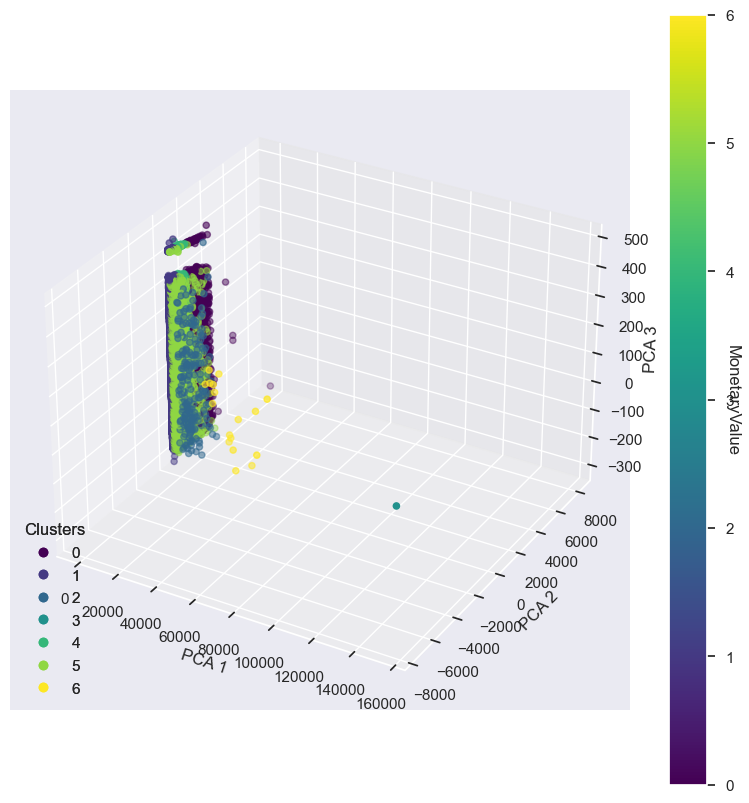

In [57]:
# Réduction de la dimensionnalité de l'ensemble de données en utilisant PCA
pca = PCA(n_components=3)
X = pca.fit_transform(data_score)

# Ajustement de l'algorithme aux données
model.fit(X)

# Récupération des labels de chaque point
labels = model.labels_

# Affichage des points dans un scatter plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

# Ajout d'une légende
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Clusters")
ax.add_artist(legend1)
cbar = fig.colorbar(scatter, ax=ax)
cbar.ax.set_ylabel('MonetaryValue', rotation=270)

# Affichage des statistiques des clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Nombre de clusters : {n_clusters}')

plt.show()


In [47]:
data_rfms = X_RFMS.copy()
data_dlrs = X_DLRS.copy()

In [48]:
data_rfms

,R,F,M,Satisfaction
0,4,1,3,5.0
1,4,1,1,4.0
2,1,1,2,3.0
3,2,1,1,4.0
4,2,1,3,5.0
...,...,...,...,...
96091,1,1,4,5.0
96092,2,1,2,4.0
96093,1,1,2,5.0
96094,3,1,3,5.0


In [49]:
data_dlrs

,MonetaryValue,distance_client_vendeur,%_frais_livraison,Rapidité_livraison_mean,Satisfaction
0,141.90,110.496092,9.237875,4.0,5.0
1,27.19,22.190341,43.862434,4.0,4.0
2,86.22,515.379484,24.956522,1.0,3.0
3,43.62,2468.983992,67.833782,11.0,4.0
4,196.89,154.744091,9.383333,7.0,5.0
...,...,...,...,...,...
96091,4134.84,1990.407282,31.682803,26.0,5.0
96092,84.58,1523.628196,30.343658,2.0,4.0
96093,112.46,1524.922045,25.094549,29.0,5.0
96094,133.69,638.851548,16.252174,13.0,5.0


In [50]:
# Enregistrez le DataFrame en tant que fichier csv à l'aide de la méthode to_csv() 
data_rfms.to_csv('data_rfms.csv', index=False)

In [51]:
# Enregistrez le DataFrame en tant que fichier csv à l'aide de la méthode to_csv() 
data_dlrs.to_csv('data_dlrs.csv', index=False)

In [52]:
data_tsne = data_rfms.copy()

## t-SNE : RFMS

In [59]:
data_tsne

,R,F,M,Satisfaction
0,4,1,3,5.0
1,4,1,1,4.0
2,1,1,2,3.0
3,2,1,1,4.0
4,2,1,3,5.0
...,...,...,...,...
96091,1,1,4,5.0
96092,2,1,2,4.0
96093,1,1,2,5.0
96094,3,1,3,5.0


On va essayer de tester la méthode t-SNE pour réduire la dimensionnalité des données RFMS.  Ensuite, on a ajusté le modèle aux données RFMS et obtenu les nouvelles données réduites en 2D. on affiche les données réduites en utilisant un scatter plot.

/Users/azizi/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/azizi/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


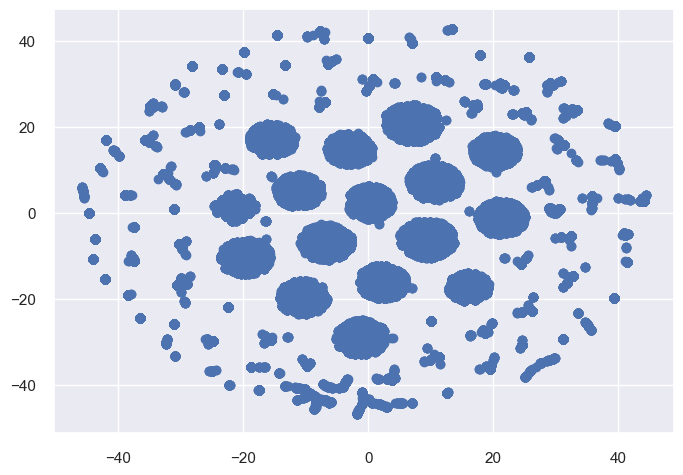

In [60]:
from sklearn.manifold import TSNE

# Réduction de dimensionnalité avec t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(data_tsne)

# Affichage des données réduites en 2D
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()


On va appliquer un Clustering KMeans sur ces données X_tsne reduite avec t-SNE. Pour déterminer le nombre optimal de clusters à utiliser dans le modèle, on a utilisé la classe KElbowVisualizer. Selon le graphique coude (Elbow), le nombre optimal de clusters est de 7. Pour évaluer la qualité des clusters obtenus pour différents nombres de clusters, on a également utilisé la métrique silhouette, dont le coefficient est d'environ 0,38.

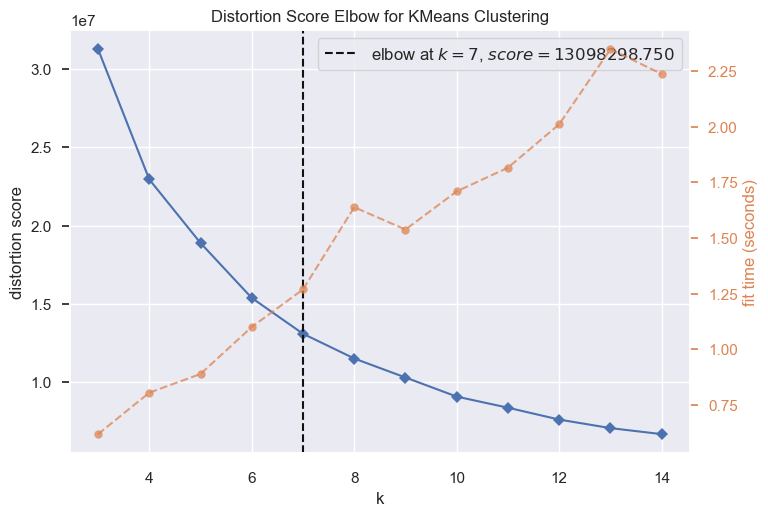

In [61]:
# Définir le modèle KMeans
model = KMeans()

# Définir la classe KElbowVisualizer pour sélectionner le nombre optimal de clusters
visualizer = KElbowVisualizer(model, k=(3,15))

# Ajuster le modèle aux données RFM
visualizer.fit(X_tsne)

# Afficher le graphique pour sélectionner le nombre optimal de clusters
visualizer.poof()
visualizer.set_title("Sélection du nombre optimal de clusters avec la méthode Elbow et la métrique silhouette")


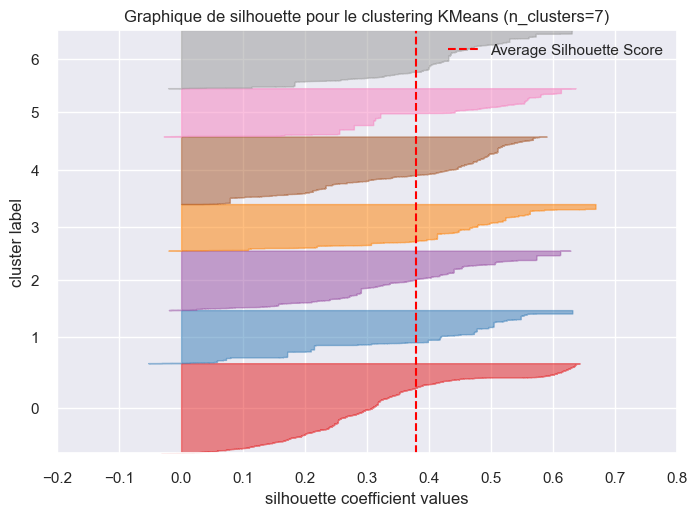

<AxesSubplot:title={'center':'Graphique de silhouette pour le clustering KMeans (n_clusters=7)'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [62]:
# Définir le modèle KMeans avec le nombre de clusters
model = KMeans(n_clusters=7)

# Définir le visualiseur SilhouetteVisualizer
visualizer = SilhouetteVisualizer(model)

# Adapter les données au visualiseur
visualizer.fit(X_tsne)

# Ajouter des annotations au graphique de silhouette
visualizer.ax.set_xlabel("Coefficient de silhouette")
visualizer.ax.set_ylabel("Étiquette de cluster")

# Définir le titre avec le nombre de clusters
visualizer.title = 'Graphique de silhouette pour le clustering KMeans (n_clusters=7)'

# Afficher le graphique
visualizer.poof()

### Choix de modèle

Après avoir testé plusieurs modèles de clustering, il s'avère que KMeans est plus rapide et efficace que les autres modèles (DBSCAN et HAC) pour nos données. Ainsi, il peut constituer un bon choix pour notre tâche de clustering, d'autant plus que DBSCAN et HAC sont plus gourmands en termes de ressources.

En effet, la méthode HAC (agglomérative hiérarchique) peut s'avérer très lourde en termes de calculs, surtout si le nombre d'observations est important. En outre, il peut être difficile de choisir le bon nombre de clusters avec cette méthode. Quant à DBSCAN, bien qu'il soit moins gourmand en ressources que HAC, il nécessite tout de même une phase de paramétrage qui peut prendre du temps pour déterminer les meilleurs paramètres de densité et de distance. En comparaison, KMeans est plus facile à utiliser et permet d'obtenir des résultats satisfaisants en un temps raisonnable.
